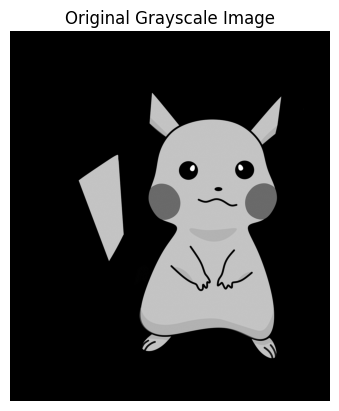

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 

# Load the image and convert to grayscale. 
image = cv2.imread("pokemon.jpg", cv2.IMREAD_GRAYSCALE)

# Display the image. 
plt.imshow(image, cmap="gray")
plt.title("Original Grayscale Image")
plt.axis("off")
plt.show()

In [2]:
prewitt_x = np.array([
    [-1, 0, 1],
    [-1, 0, 1],
    [-1, 0, 1]
])

prewitt_y = np.array([
    [-1, -1, -1],
    [ 0,  0,  0],
    [ 1,  1,  1]
])

In [3]:
height, width = image.shape
print(f"Height: {height}, Width: {width}")

Height: 1280, Width: 1106


In [4]:
# Since our filter size is 3, filter radius will be 1. 
padded_image = np.pad(image, pad_width=1, mode="constant")
gradient_x = np.zeros((height, width))
gradient_y = np.zeros((height, width))
gradient_magnitude = np.zeros((height, width))

In [5]:
for i in range(0, height):
    for j in range(0, width):
        region = padded_image[i:i+3, j:j+3]
        gx = np.sum(region * prewitt_x)
        gy = np.sum(region * prewitt_y)

        gradient_x[i, j] = gx
        gradient_y[i, j] = gy
        gradient_magnitude[i, j] = np.sqrt(gx**2 + gy**2)

gradient_magnitude = (gradient_magnitude / np.max(gradient_magnitude) * 255).astype(np.uint8)

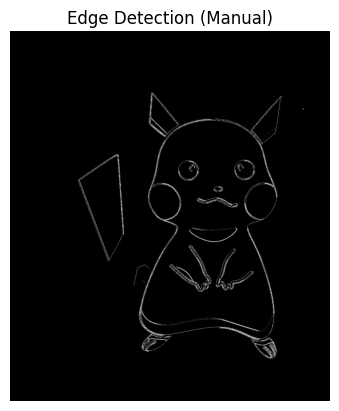

In [10]:
plt.imshow(gradient_magnitude, cmap='gray')
plt.title("Edge Detection (Manual)")
plt.axis("off")
plt.show()

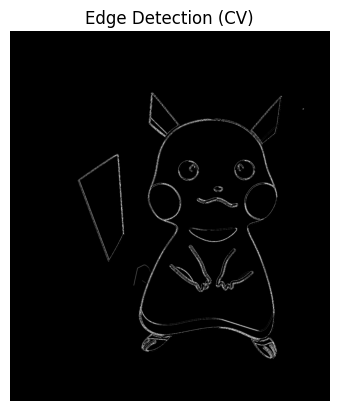

In [11]:
prewitt_x_oc = cv2.filter2D(image, -1, prewitt_x)
prewitt_y_oc = cv2.filter2D(image, -1, prewitt_y)

gradient_magnitude = np.sqrt(prewitt_x_oc**2 + prewitt_y_oc**2)
gradient_magnitude = (gradient_magnitude / np.max(gradient_magnitude) * 255).astype(np.uint8)

plt.imshow(gradient_magnitude, cmap='gray')
plt.title("Edge Detection (CV)")
plt.axis("off")
plt.show()